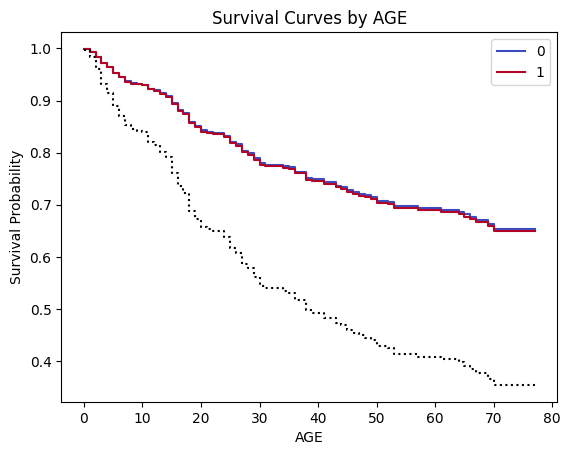

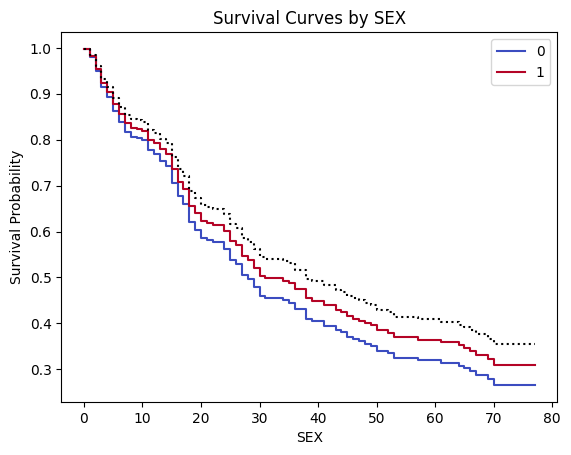

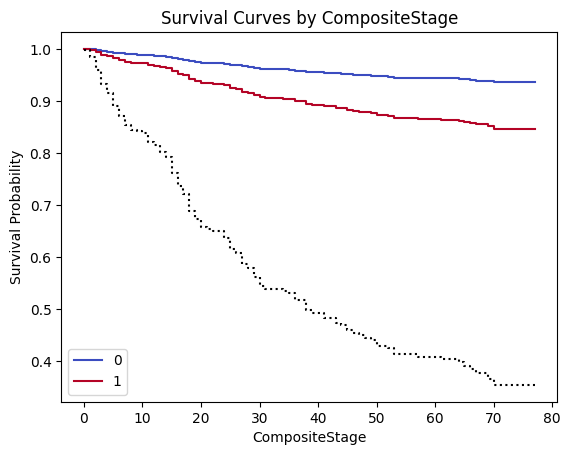

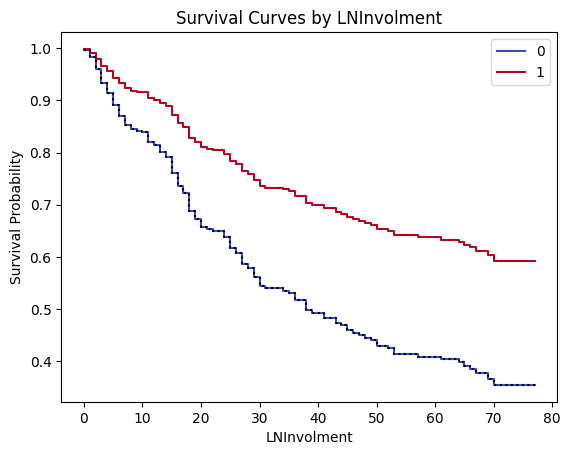

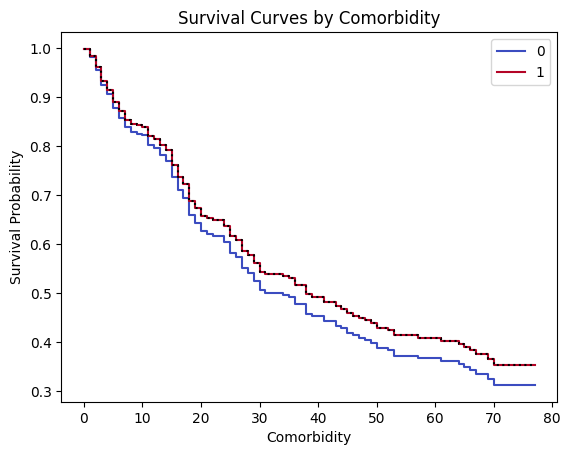

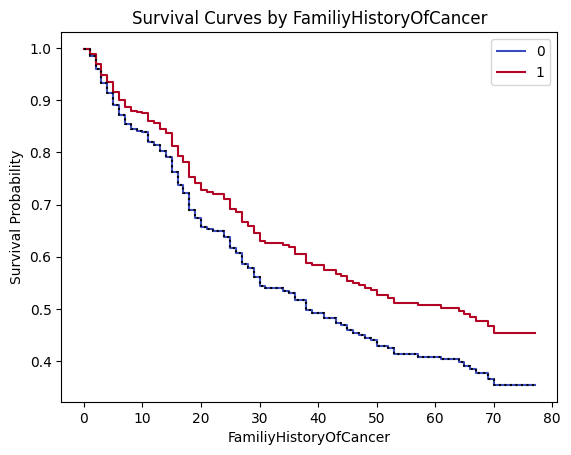

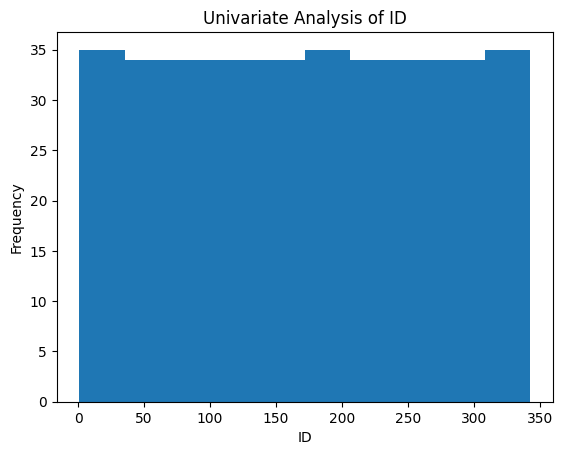

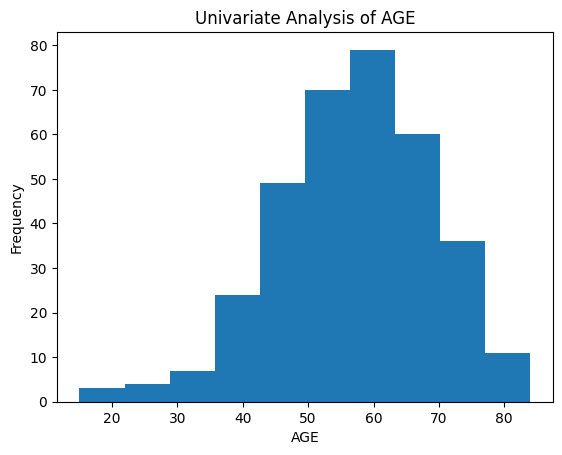

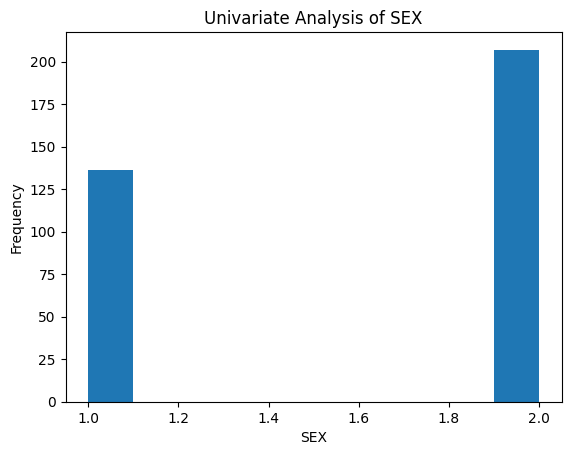

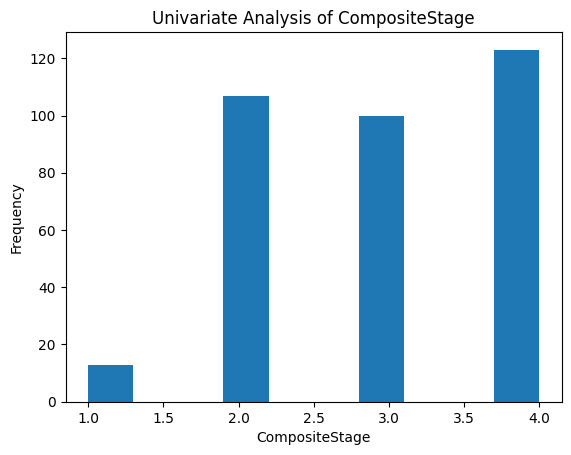

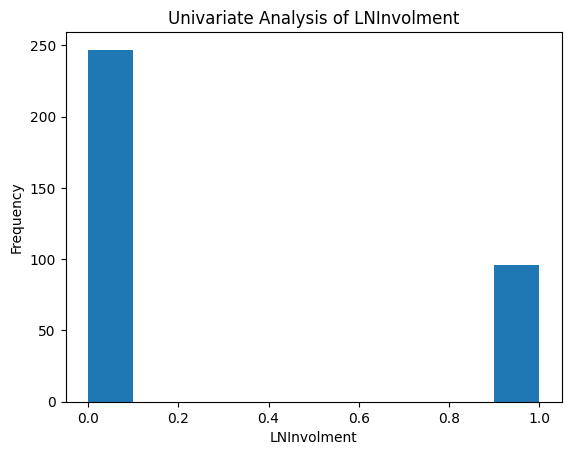

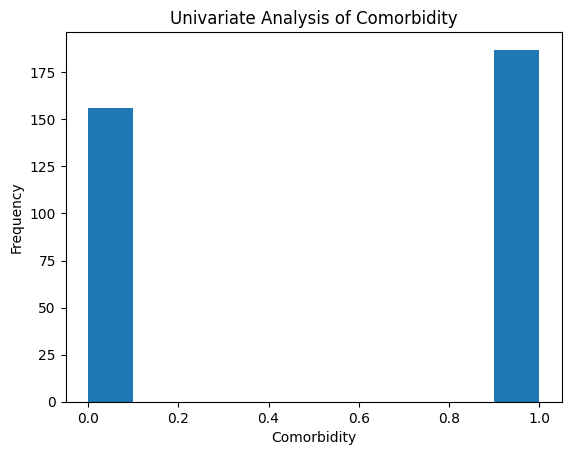

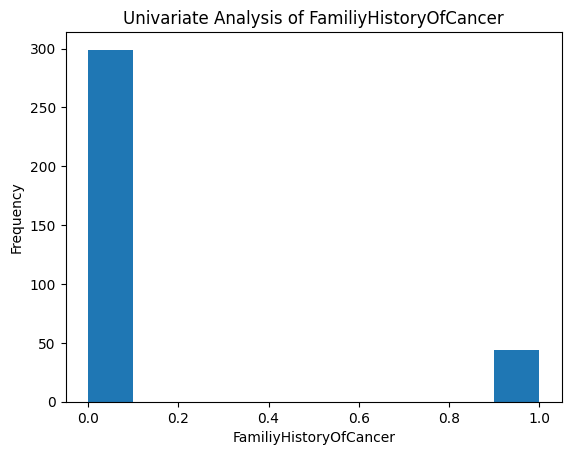

AIC: 1769.942369337933
BIC: 1796.8064824680946


In [1]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('data1.xlsx')

# Create a new instance of the CoxPHFitter class
cph = CoxPHFitter()

# Fit the Cox Proportional Hazard model to the data
cph.fit(data, duration_col='Months', event_col='DEATH')
n = len(data)
llf = cph.log_likelihood_
k = cph.params_.shape[0]
aic = -2 * llf + 2 * k
bic = -2 * llf + k * np.log(n)


# Plot the survival curves for different covariate values
covariates_to_plot = ['AGE', 'SEX', 'CompositeStage', 'LNInvolment', 'Comorbidity', 'FamiliyHistoryOfCancer']
for covariate in covariates_to_plot:
    cph.plot_partial_effects_on_outcome(covariates=covariate, values=[0, 1], cmap='coolwarm')
    plt.xlabel(covariate)
    plt.ylabel('Survival Probability')
    plt.title('Survival Curves by ' + covariate)
    plt.legend(['0', '1'])
    plt.show()

# Perform univariate analysis for each variable
for column in data.columns:
    if column not in ['Months', 'DEATH']:
        # Plot the variable
        plt.figure()
        plt.hist(data[column])
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Univariate Analysis of {column}')
        plt.show()

# Print AIC and BIC
print("AIC:", aic)
print("BIC:", bic)
